In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("CC GENERAL.csv")
data.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [4]:
medianOfMinPayment = data['MINIMUM_PAYMENTS'].median()
data['MINIMUM_PAYMENTS'].fillna(value=medianOfMinPayment, inplace=True)

medianOfCreditLimit = data['CREDIT_LIMIT'].median()
data['CREDIT_LIMIT'].fillna(value=medianOfCreditLimit, inplace=True)

In [5]:
data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [6]:
del data['CUST_ID']

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)

data_pca = pca.fit_transform(X)
data_pca.shape

(8950, 2)

In [11]:
pca.explained_variance_

array([4.64112269, 3.45372843])

In [13]:
pca.components_

array([[ 0.10173544,  0.12049021,  0.41156248,  0.34633416,  0.33676111,
        -0.02281015,  0.32123243,  0.29449275,  0.27449433, -0.08858179,
        -0.04813564,  0.39059806,  0.21191604,  0.26648172,  0.06326857,
         0.13183292,  0.08108567],
       [ 0.40381794,  0.13134449,  0.04002439,  0.06191764, -0.0191758 ,
         0.43902686, -0.1911485 , -0.01856128, -0.17886883,  0.4341208 ,
         0.41964369, -0.0201669 ,  0.23802901,  0.25671551,  0.16906597,
        -0.19006539, -0.00425538]])

In [21]:
columnNames = np.array(data.columns)
columnNames

array(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'], dtype=object)

C:\Users\fatih\AppData\Local\Temp\ipykernel_13536\2568907456.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


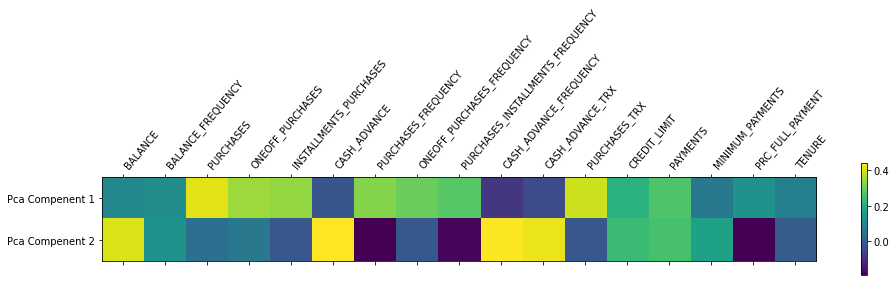

In [26]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ['Pca Compenent 1', 'Pca Compenent 2'], fontsize=10)
plt.colorbar()
plt.xticks(range(len(columnNames)),columnNames, rotation=50, ha='left')
plt.tight_layout()
plt.show()

In [90]:
pca.explained_variance_ratio_

array([0.27297671, 0.2031378 ])